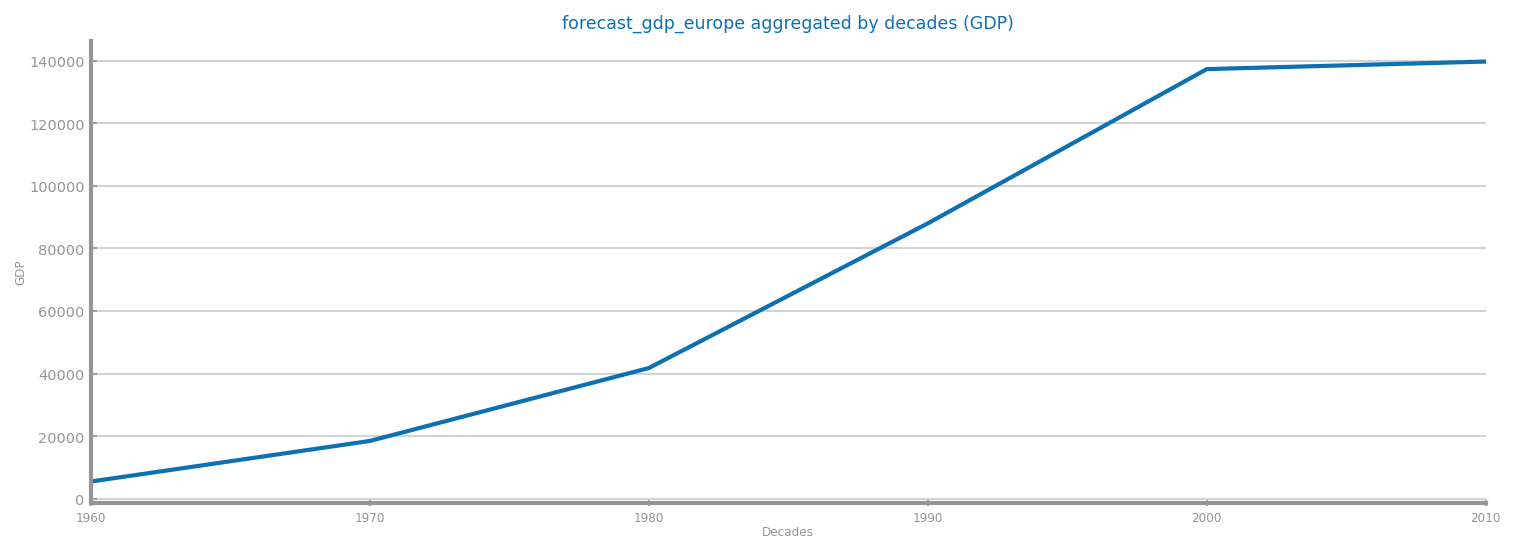

In [8]:
from numpy import sum
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart

# File details
file_tag = "forecast_gdp_europe"
filename = "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv"
index = "Year"
target = "GDP"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=",",  # Comma-separated values
    decimal=".",  # Use period for decimal
    parse_dates=[index],  # Parse the Year column
    infer_datetime_format=True,
)
data.set_index(index, inplace=True)

# Aggregation (Optional: Aggregate by decades)
data["Decade"] = (data.index.year // 10) * 10  # Erstelle eine Spalte für Dekaden
ss_decades: Series = data.groupby("Decade")[target].sum()

# Plot aggregated data by decades
figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_decades.index.to_list(),
    ss_decades.to_list(),
    xlabel="Decades",
    ylabel=target,
    title=f"{file_tag} aggregated by decades ({target})",
)
show()


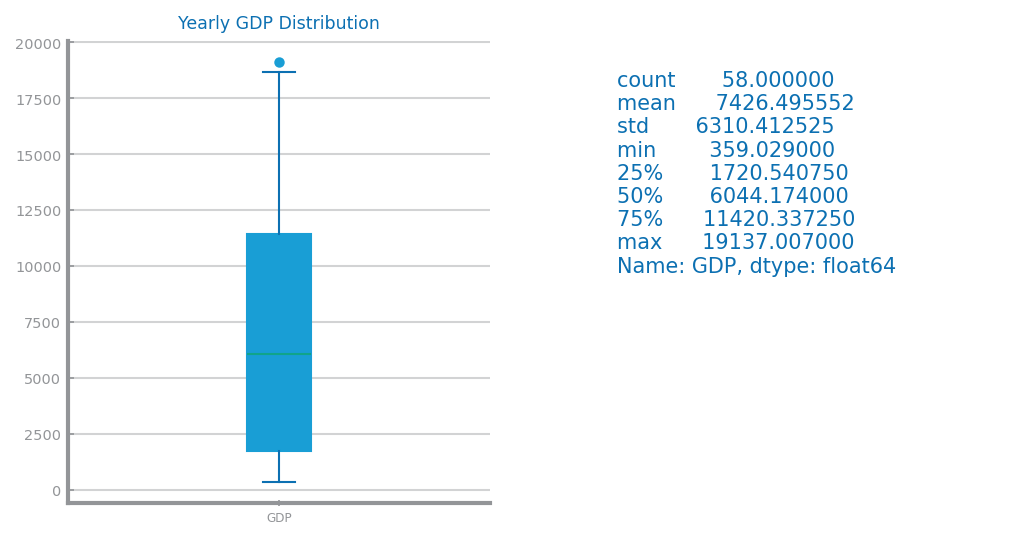

In [7]:
from numpy import array
from matplotlib.pyplot import show, subplots
from matplotlib.figure import Figure
from dslabs_functions import set_chart_labels

# Subplots erstellen
fig: Figure
axs: array
fig, axs = subplots(1, 2, figsize=(2 * HEIGHT, HEIGHT))

# Boxplot für Jahresdaten (GDP)
set_chart_labels(axs[0], title="Yearly GDP Distribution")
axs[0].boxplot(data["GDP"])
axs[0].set_xticks([1])
axs[0].set_xticklabels(["GDP"])

# Deskriptive Statistik
axs[1].grid(False)
axs[1].set_axis_off()
axs[1].text(0.1, 0.5, str(data["GDP"].describe()), fontsize="medium")

# Plots anzeigen
show()


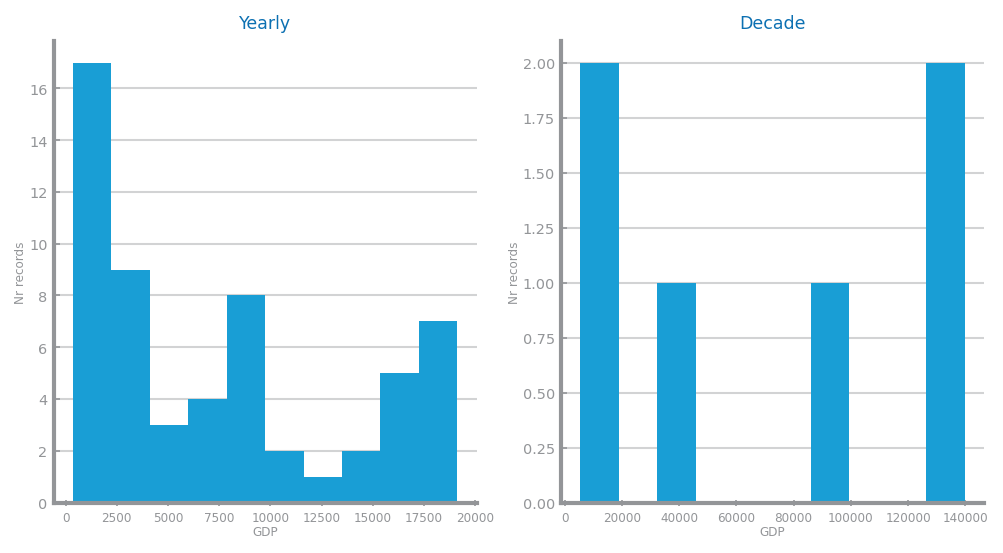

In [9]:
from numpy import sum
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import show, subplots
from matplotlib.figure import Figure
from dslabs_functions import HEIGHT, set_chart_labels

# File details
file_tag = "forecast_gdp_europe"
filename = "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv"
index = "Year"
target = "GDP"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=",",  # Comma-separated values
    decimal=".",  # Use period for decimal
    parse_dates=[index],  # Parse the Year column
    infer_datetime_format=True,
)
data.set_index(index, inplace=True)

# Aggregation: Original (Yearly) and by Decades
data["Decade"] = (data.index.year // 10) * 10  # Create a decade column
ss_years: Series = data[target]  # Original yearly data
ss_decades: Series = data.groupby("Decade")[target].sum()  # Decade aggregation

# Combine aggregations
grans: list[Series] = [ss_years, ss_decades]
gran_names: list[str] = ["Yearly", "Decade"]

# Plot histograms
fig: Figure
axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))[1]
fig.suptitle(f"{file_tag} {target}")

for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel=target, ylabel="Nr records")
    axs[i].hist(grans[i].values)

# Show histograms
show()


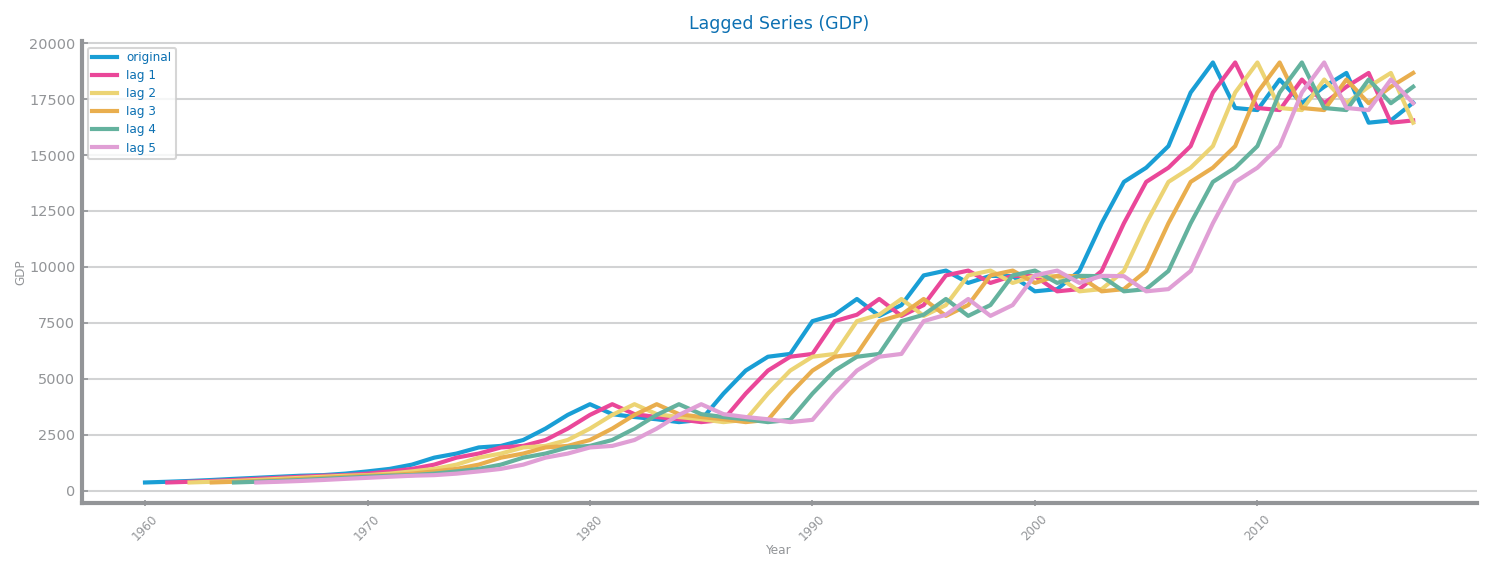

In [10]:
from dslabs_functions import plot_multiline_chart
from pandas import Series
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT

def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


# Generiere Lagged Series für jährliche Daten
max_lag = 5  # Maximaler Lag auf 5 Jahre beschränkt
lags = get_lagged_series(series, max_lag, 1)

# Visualisiere die Lagged Series
figure(figsize=(3 * HEIGHT, HEIGHT))
plot_multiline_chart(
    series.index.to_list(), 
    lags, 
    xlabel="Year", 
    ylabel=target, 
    title=f"Lagged Series ({target})"
)
show()



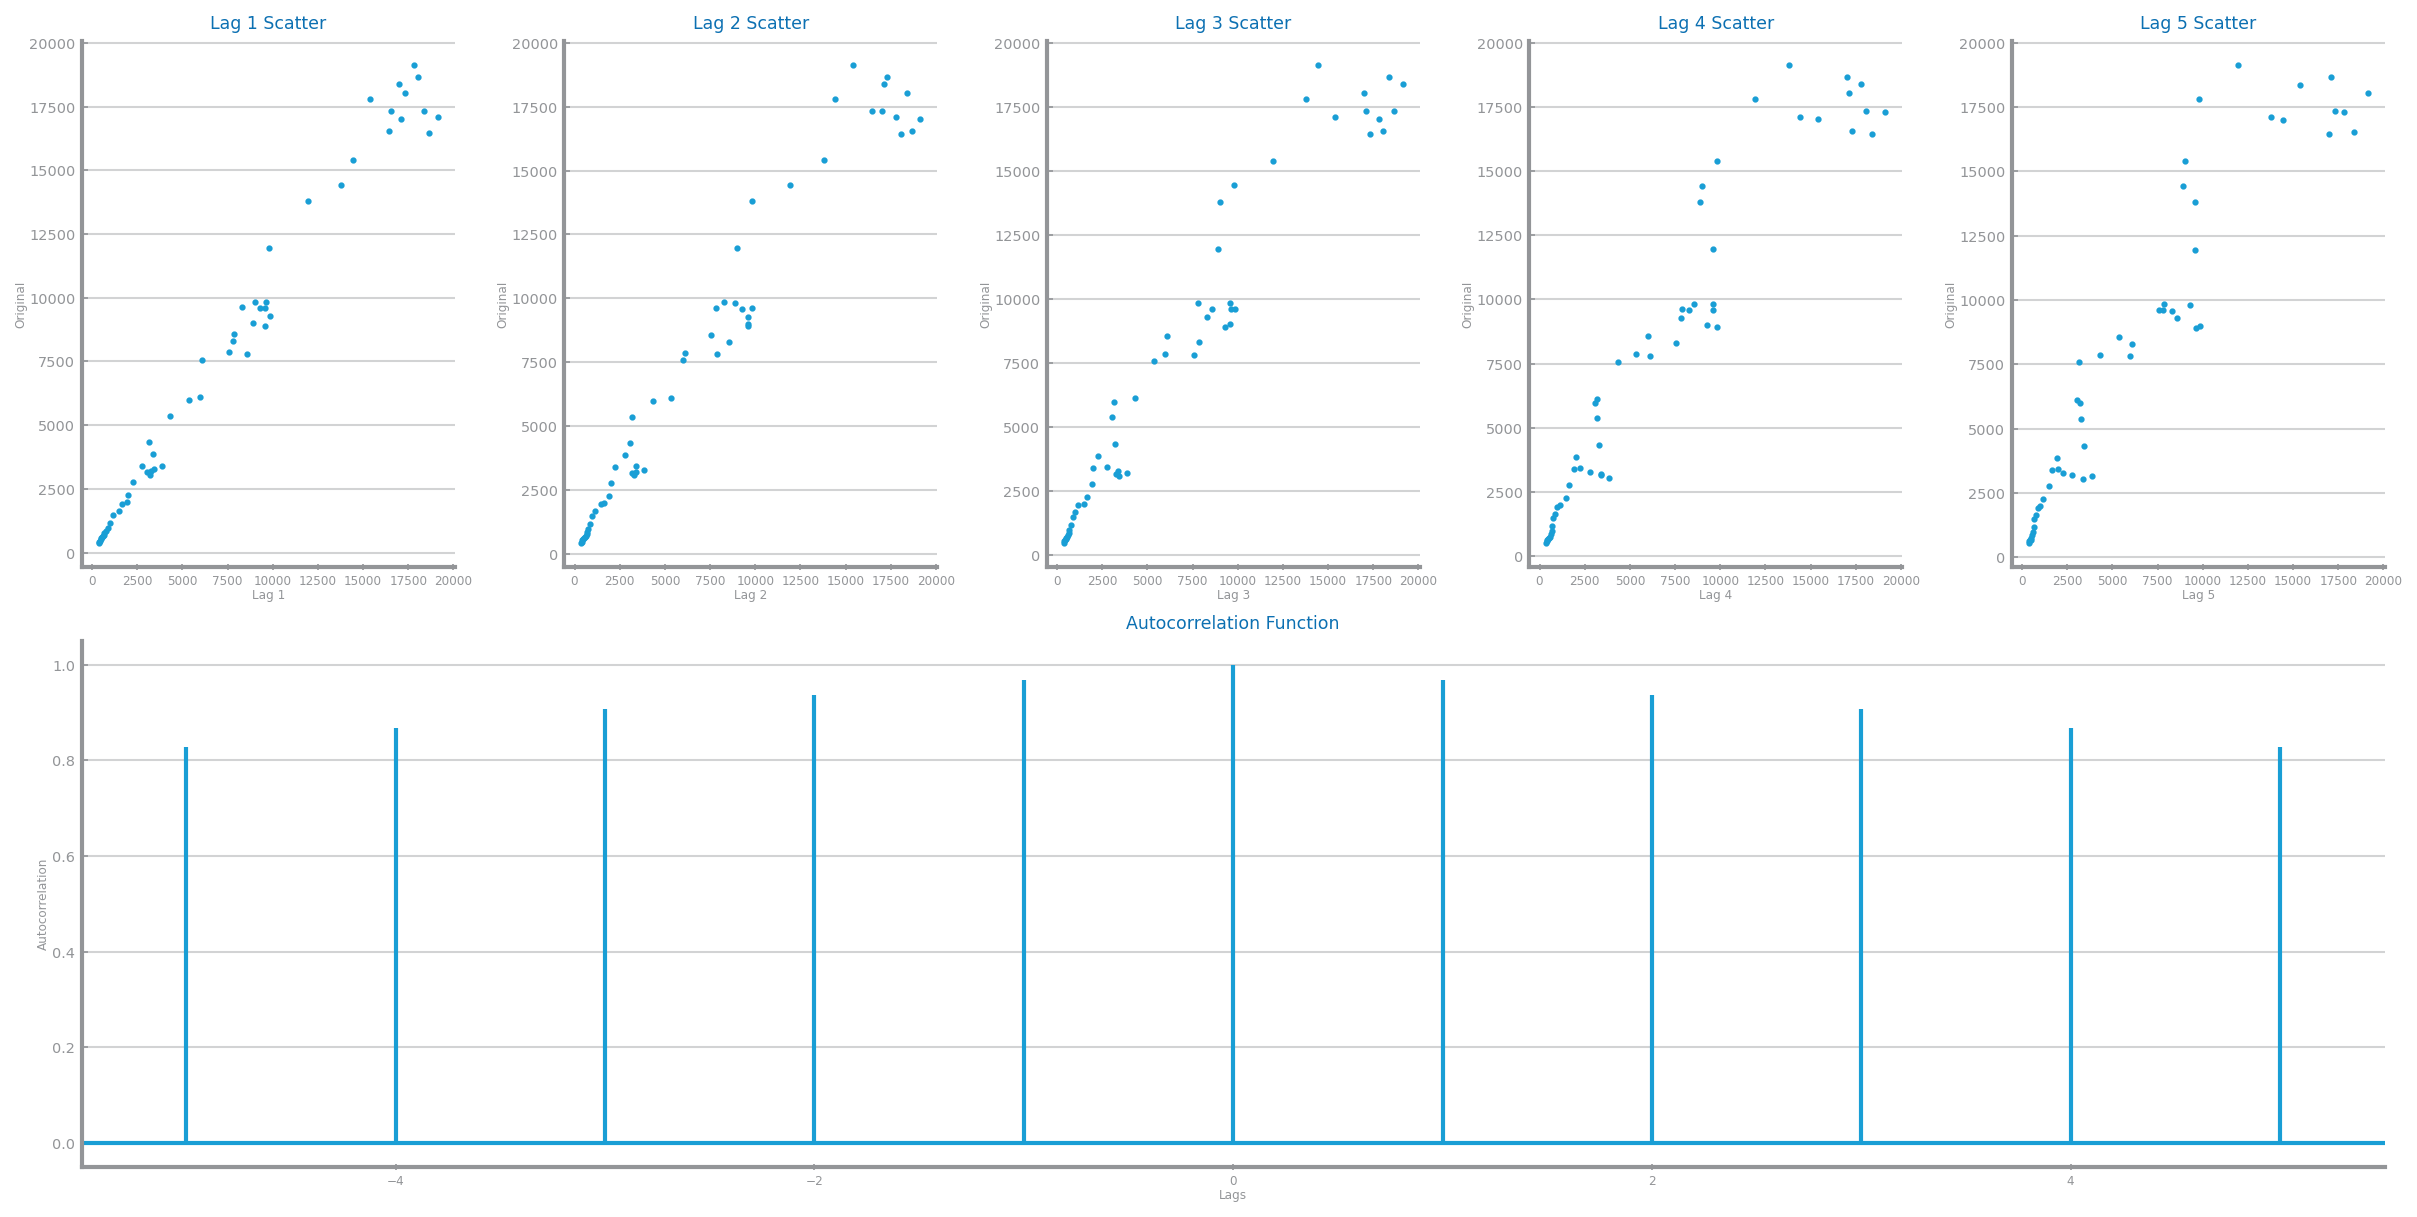

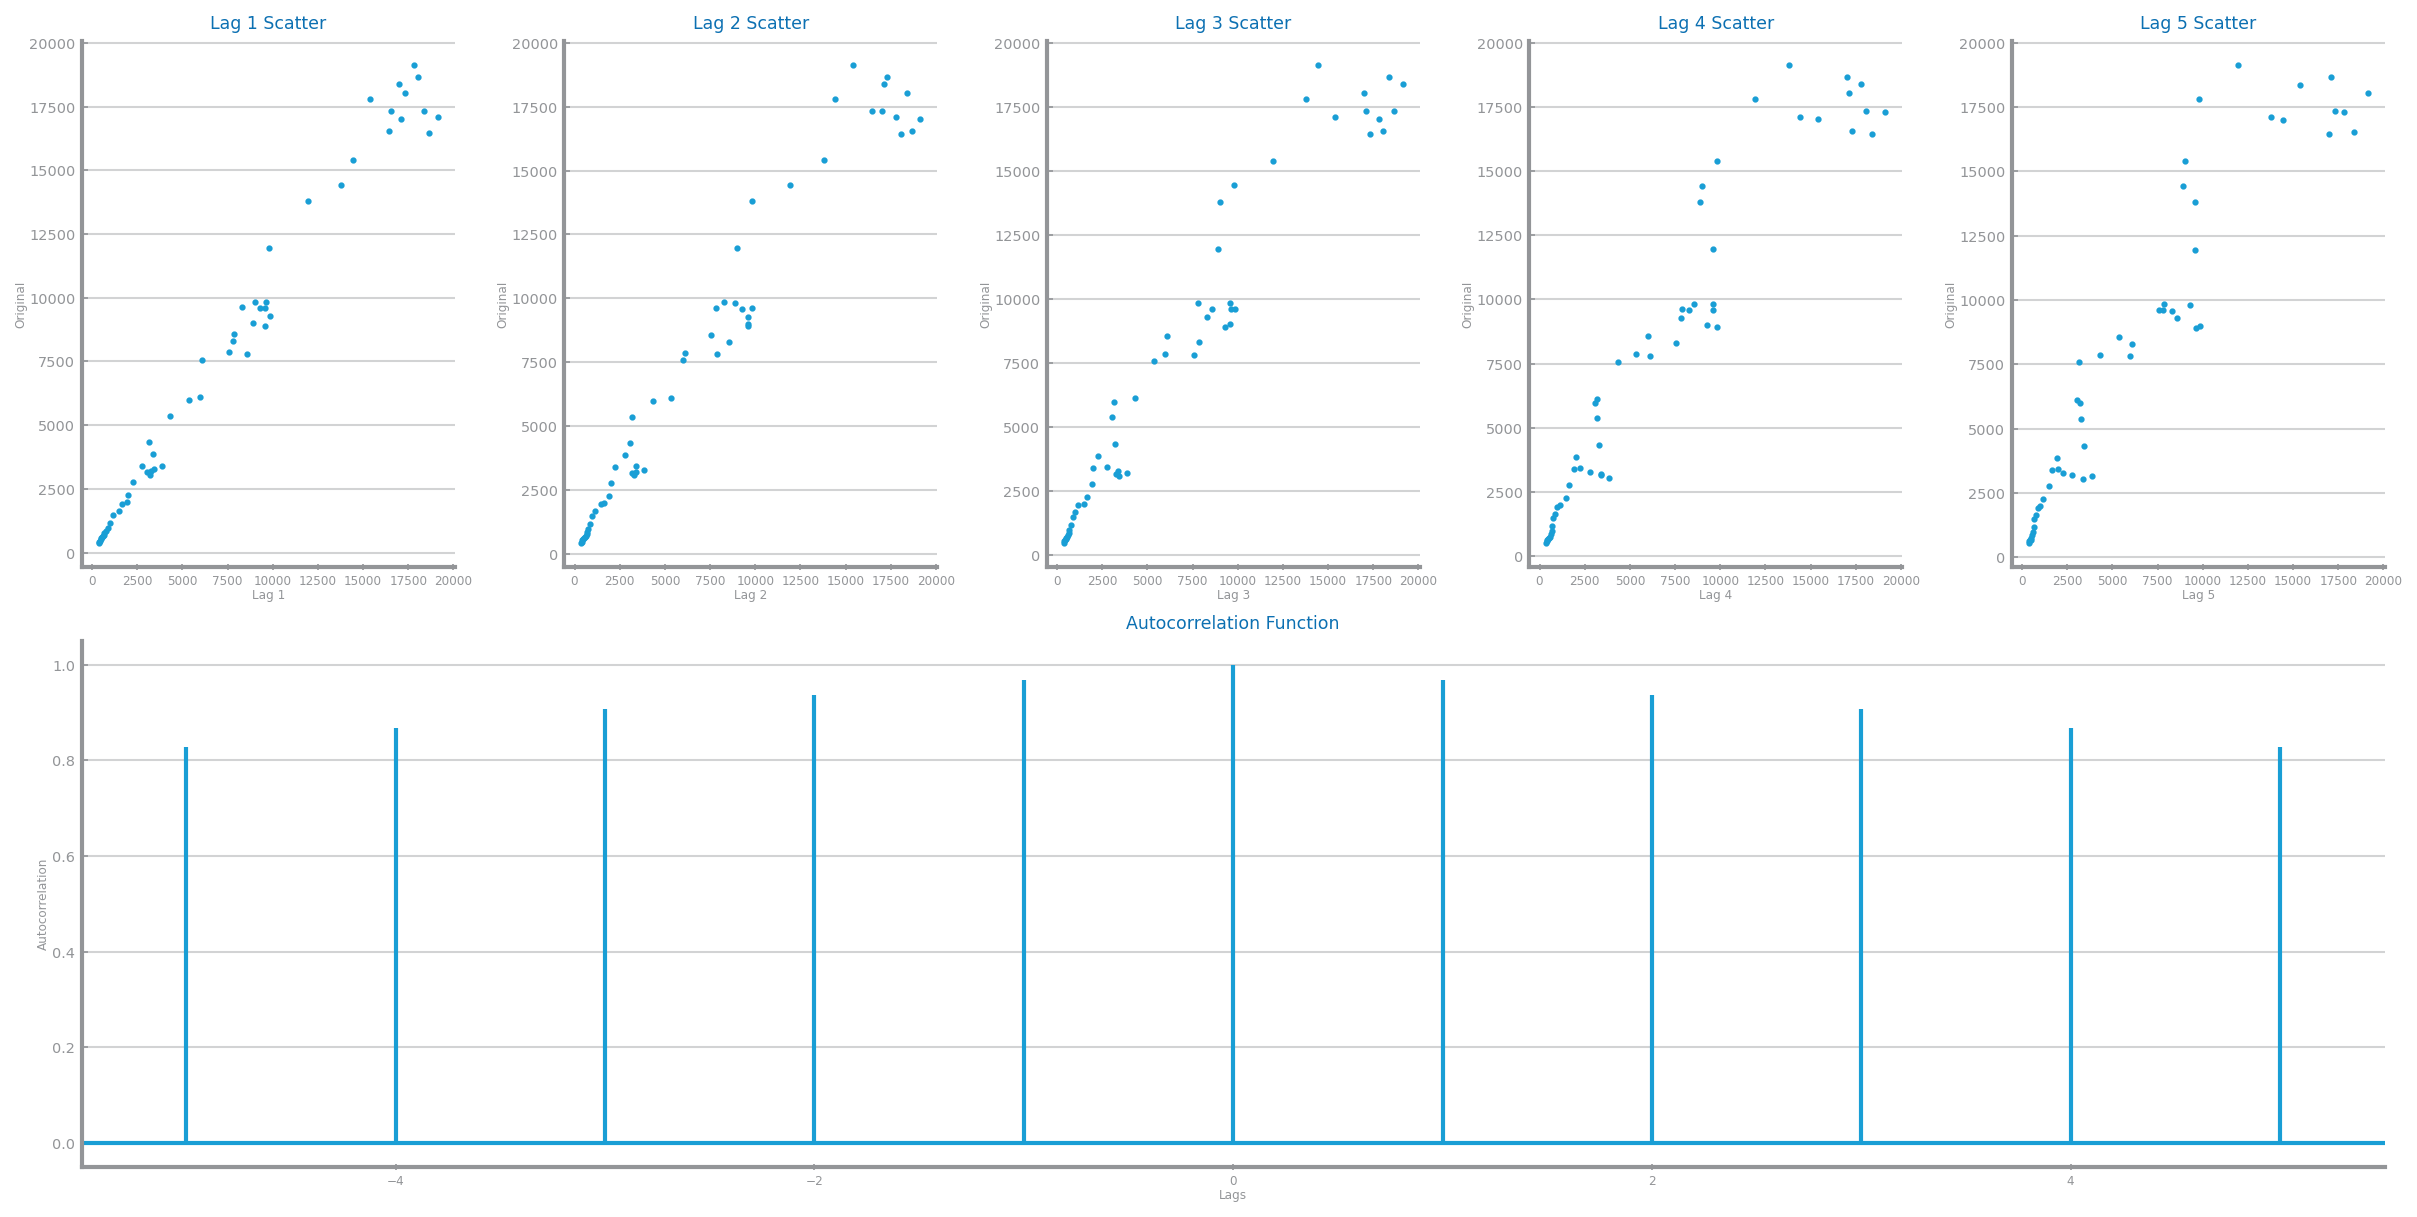

In [11]:
from matplotlib.pyplot import figure
from matplotlib.gridspec import GridSpec
from pandas import Series
from dslabs_functions import HEIGHT

def autocorrelation_study(series: Series, max_lag: int, delta: int = 1):
    """
    Perform an autocorrelation study by visualizing scatter plots for lagged values
    and calculating the autocorrelation function.
    """
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    # Original series values
    series_values: list = series.tolist()

    # Create scatter plots for lagged values
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        lagged_series = series.shift(lag).tolist()
        ax.scatter(lagged_series, series_values)
        ax.set_xlabel(f"Lag {lag}")
        ax.set_ylabel("Original")
        ax.set_title(f"Lag {lag} Scatter")

    # Plot autocorrelation
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation Function")
    ax.set_xlabel("Lags")
    ax.set_ylabel("Autocorrelation")
    return fig


# Perform autocorrelation study with limited lags
max_lag = 5  # Limit to 5 lags (suitable for yearly data)
autocorrelation_study(series, max_lag, 1)
